In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('neos.csv')

In [6]:
data['close_approach_date'] = pd.to_datetime(data['close_approach_date'])

In [20]:
def get_month_hazardous_neos(start_date, end_date):

    mask = (data['close_approach_date'] >= pd.to_datetime(start_date)) & (data['close_approach_date'] <= pd.to_datetime(end_date));
        
    neos = data.loc[mask];

    split_hazard_neos = neos.groupby('is_potentially_hazardous');

    hazardous_neos = split_hazard_neos.get_group(True);

    return hazardous_neos;

def plot_hazardous_neos_for_month_3d(start_date, end_date, month_name):
    
    hazardous_neos = get_month_hazardous_neos(start_date, end_date);


    fig = plt.figure(figsize=(20,15))
    
    ax = fig.add_subplot(111, projection='3d')

    x = hazardous_neos['estimated_max_diameter_kilometers']
    y = hazardous_neos['miss_distance_kilometers']
    z = hazardous_neos['relative_velocity_kps']



    ax.scatter(x, y, z, s= 100, c='r', marker='o')
    
    plt.title('January', fontsize=50)

    ax.set_xlabel('estimated_max_diameter_kilometers')
    ax.set_ylabel('miss_distance_kilometers 1e7')
    ax.set_zlabel('relative_velocity_kps')

    plt.show();

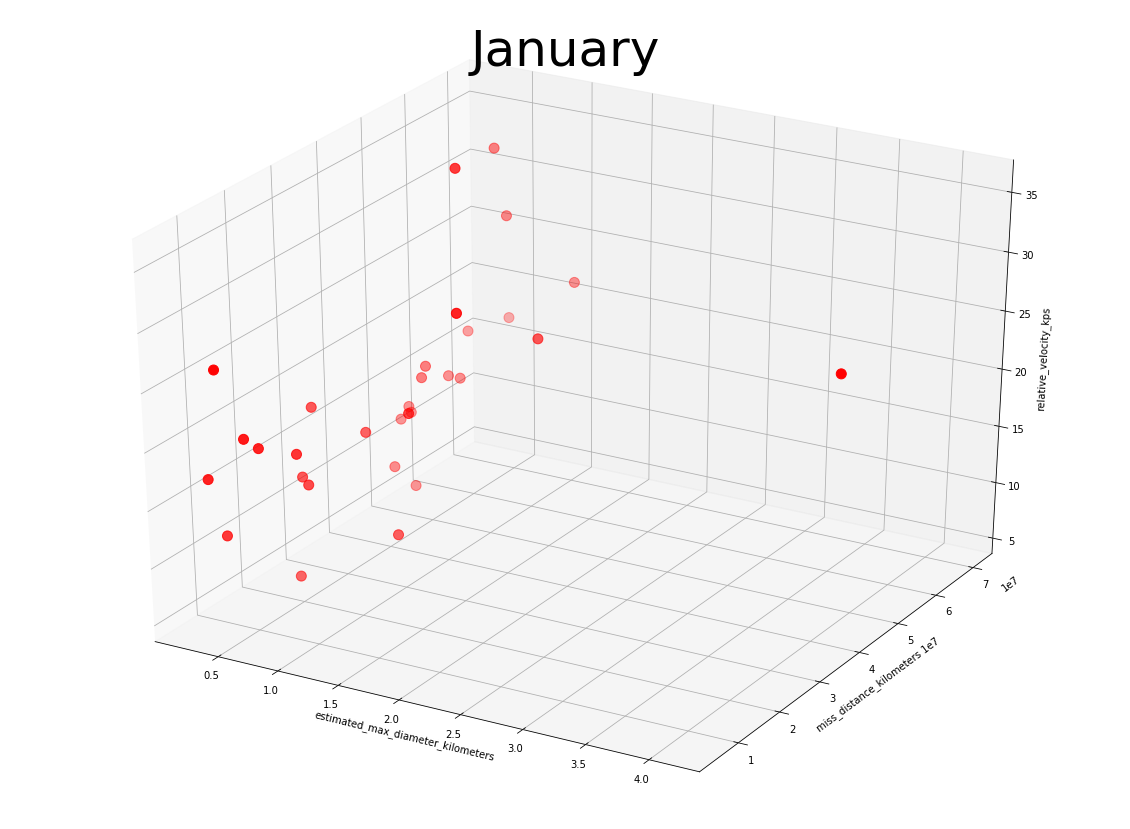

In [21]:
plot_hazardous_neos_for_month_3d('2018-1-01', '2018-1-31', 'January')